In [1]:
import sounddevice as sd


from source.processing import *
from config.settings import PROCESSING
from utils.plotting import plot_spectrogram

In [2]:
freq = fft_frequencies(sr=PROCESSING.sampling_rate, n_fft=PROCESSING.n_fft)

In [3]:
sg = wav_to_spectrogram(os.path.join(PROCESSING.original_audio_folder, "scales_piano.wav"), debug=True)(win_length=PROCESSING.win_length, n_fft=PROCESSING.n_fft)

signal shape: (2116800,)
sample rate: 44100

spectrogram shape: (512, 8302)



D:\Repos\AST\source\processing.py:76: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, sig = wavfile.read(filename)


In [4]:
scaled_freq, scaled_sg = log_scale(freq, sg, return_freq=True)

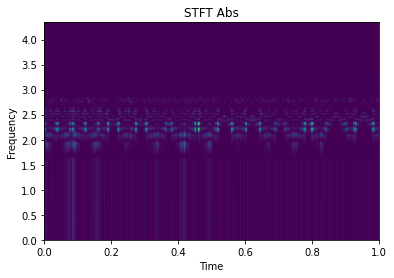

In [5]:
plot_spectrogram(scaled_freq, scaled_sg)

In [6]:
tensor, scalar = spectrogram_to_tensor(scaled_sg, debug=True)

m1 shape: (512, 8302)
m2 shape: (512, 8302)



In [7]:
spectrogram = tensor_to_spectrogram(tensor, scalar, debug=True)

m1 shape: (512, 8302)
m2 shape: (512, 8302)



In [8]:
descaled_sg = inverse_log_scale(scaled_freq, spectrogram)

In [9]:
sig = spectrogram_to_wav(descaled_sg, PROCESSING.sampling_rate, debug=True)(win_length=PROCESSING.win_length, n_fft=PROCESSING.n_fft)

spectrogram shape: (512, 8302)

signal shape: (2116755,)
sample rate: 44100



In [10]:
sd.play(*sig)

In [11]:
sd.stop()

In [20]:
get_split_tensors()

100%|██████████| 2/2 [00:00<00:00,  3.38it/s]


In [13]:
x_train, y_train, x_test, y_test, scalars = load_split_tensors(PROCESSING.tensors_folder)

In [14]:
restored_tensor = batch_to_tensor(y_test)

In [15]:
restored_tensor.shape

(512, 1280, 2)

In [16]:
restored_sg = tensor_to_spectrogram(restored_tensor, scalars['y'])

In [17]:
rescaled_restored_sg = inverse_log_scale(scaled_freq, restored_sg)

In [18]:
restored_audio = spectrogram_to_wav(rescaled_restored_sg, PROCESSING.sampling_rate)(win_length=PROCESSING.win_length, n_fft=PROCESSING.n_fft)

In [19]:
sd.play(*restored_audio)

In [20]:
sd.stop()